# Lecture 4

**Authors:**
* Yilber Fabian Bautista
* Keiwan Jamaly
* <a href="https://itp.uni-frankfurt.de/~osorio/index.html">Alejandro Cruz-Osorio</a>

**Last date of modification:**
 December 7th 2021

Hello there, 

Welcome to Lecture 4 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:

* Use the **Euler** and **Runge-Kutta** methods  to solve numerically  ordinary differential equations (ODEs)
* Solve first and higher order ODEs using the **scipy** library's function **solve_ivp**

## Warm up, the Euler method

Imagine we want to calculate the shape of an unknown curve which starts at a given point $A_0$ at $t_0$ and satisfies a given differential equation. Euler method can be use for such a problem. It approximates the unknown curve as follows:

Starting at the initial value $A_0$ at $t_0$, from the differential equation we can compute the slope of a tangent line to the curve at $t_0$, and so, the tangent line itself. 
We then take a small step along our  tangent line until we reach the point $A_1$ at $t_1$. For a t-step small enough, the slope of the curve does not change too much in  this t-displacement and therefore $A_1$ is still close to the curve. We can then repeat the reasoning as for $A_0$, that is,  taking $A_1$ as our initial value, and from the differential equation compute the slope of a tangent line to the curve at $t_1$, then move along the new tangent line until reaching $A_2$ at $t_2$. The process is then repeated until we reach the final time $t_n$, at which we would like to know the value of the unknown value of the  curve $A_n$. 
Schematically this is:

![Euler Example](Figures/Euler_method.png)

Figure taken from  [here](https://en.wikipedia.org/wiki/Euler_method)

The Euler method is a first-order method, this means that the local error (or the error per step) is proportional to the square of the step size, whereas the  global error (the error at a given $t$) is proportional to the step size $\Delta t$

What we just described in words can be made precise with equations:

Given 
\begin{equation*}
y'(t) = f(t,y),\quad y(t_0)=y_0,
\end{equation*}

we choose a value $h$  for the  step size so that for $t_n = t_0+n h$. After one step in the Euler method from $t_n$  to $t_{n+1} = t_n+h$. We can evaluate $y(t_{n+1}) = y_{n+1}$ by expanding  around $h=0$. That is 

$$y(t_{n+1}) = y(t_n) + y'(t_n) h +\mathcal{O}(h^2),$$ 
and replace $y'(t_n)$ by the r.h.s. of the  differential equation. That is, 

$$
y(t_n+h) = y(t_n) + f(t_n,y(t_n)) h +\mathcal{O}(h^2)
$$
or in a index notation
$$
y_{n+1} = y_{n}+ f(t_n,y_n) h +\mathcal{O}(h^2)
$$

As an example, if the differential equation is
$$y'(t) = -y(t)$$

we can set the function f(y, t) to be
$$f(y,t) = -y(t)$$

In [1]:
import numpy as np

def Euler(t_min,t_max,n,y_0):
    #Define a t-array
    t = np.linspace(t_min,t_max,num=n)
    #step size
    h = t[1] - t[0]
    #Initialize an array to save the values of y
    y = np.zeros(n)
    #Set initial condition
    y[0] = y_0
    #write the Euler method
    for i in range(n-1):
        y[i+1] = y[i] + h*(-y[i])
    
    return y

Let us now use the method in an specific example

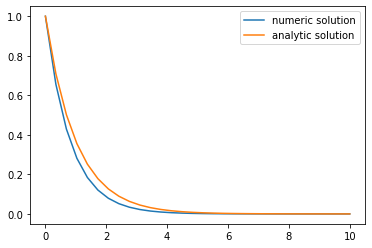

In [2]:
import matplotlib.pyplot as plt

t_min = 0.
t_max = 10.
n = 30
y_0 = 1.


#use Euler method
sol = Euler(t_min,t_max,n,y_0)

#compare to the analytic solution y[t] = Exp(-t)
t = np.linspace(t_min,t_max,num=n)
a_sol = np.exp(-t)

#plot the findings

plt.plot(t, sol, label="numeric solution")
plt.plot(t, a_sol, label="analytic solution")
plt.legend()
plt.show()

# Exercise 1
Use the **Euler** method previously programed and vary $n$,  What happens for different step sizes?  Plot your findings using a `for` loop.

In [4]:
#write your solution here

# Exercise 2
- Generalize the `Euler()` function defined above to take as input a general function $f(y,t)$ which is the function in the  r.h.s. of the differential equation: 
```
Euler(f, t_min, t_max, n, y_0)
```
- As before, use your new `Euler()` function to solve for $f(y,t) = -y(t)$, with $y_0=1$. Your solution should agree with the previous results. 
- Using your new `Euler()` function, solve the differential equation
    $$y'(t) = \sin(t)+y(t)$$
with initial condition $$y(0) = 2. $$
in the time interval $[0,10]$

In [ ]:
#write your solution here

## Runge-Kutta method
As we learnt above,  Euler method is a  first order approximation. For better approximations, we can use the [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) . Runge-Kutta fourth order computes the solution for a differential equation of the form 

\begin{equation*}
y'(t) = f(t,y),\quad y(t_0)=y_0,
\end{equation*}
by 

\begin{align*}
y_{n+1} = y_n + h*\frac{k_1}{6} + h*\frac{k_2}{3} + h*\frac{k_3}{3} + h*\frac{k_4}{6}
\end{align*}

where $k_1, k_2, k_3, k_4$ are 

\begin{align*}
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n+\frac{h}{2}, y_n + \frac{h}{2}*k_1) \\
k_3 &= f(t_n+\frac{h}{2}, y_n + \frac{h}{2}*k_2) \\
k_4 &= f(t_n+h, y_n + h*k_3)
\end{align*}



# Exercise 3 (optional)
The goal of this exercise is to implement the fourth-order Runge-Kutta method to solve a first order ODE.
1. Similar to Exercise 1, create a program `Runge_Kutta()` that implements this method for a general input function $f(y,t)$.
2. Use your `Runge_Kutta()` function to solve the differential equation
 $$y'(t) = \sin(t)+y(t)$$
with initial condition $$y(0) = 2. $$
in the time interval $[0,10]$. Plot your findings and compare them with the solution from the Euler method for different number of steps $n$.  

In [ ]:
# here goes your solution

## ODE Solvers in sipy.integrate library

Now that we have gain some intuition on how numeric methods for solving first order differential equations work, we want to take advantage of the method implemented in the `sipy.integrate` library. There are two ODE solvers in this library: The  [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). `odeint` is outdated so we will not show it here, but there are good examples in the documentation and later on in case you are working with old code bases.

### The solve_ivp function

The **solve_ivp** function on the other hand,  allows for multiple methods. Among these methods we have **LSODA**, but also up to **Runge-Kutta fifth order** (this means more complicated set of equations). Luckily, this is already implemented and we do not have to program them from scratch. In reality, `scipy.integrate.solve_ivp` uses Runge-Kutta 45 method by default. This means it calculates a Runge-Kutta 4 **and** Runge-Kutta 5 step and compares these two, to vary the step size to a given relative and absolute error. This is mostly done automatically, but it can be done manually. For more information read the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) documentation or the optional section.

We will now give an example of how to use the **solve_ivp** solver in the context of fist order differential equations.

Let's say, we want to solve the differential equation 

\begin{align*}
y'(t) = y_0 - k * y
\end{align*}

first, we rewrite the equation to:
\begin{align*}
y'(t) = f(t,y)
\end{align*}

where

\begin{align*}
f(t, y) = y_0 - k*y
\end{align*}

We have now all the bits and pieces to do the numerical implementation. The syntax for solving ODEs using `solve_ivp` is the following:

```py
scipy.integrate.solve_ivp(fun, t_span, y0)
```

* fun: function that returns the derivative of $y$
* t_span: time span of the solution [0,10]
* y0: initial conditions e.q.  [0, -1] (which stands for $x(0) = 0$ and $\dot{x}(0) = -1$)


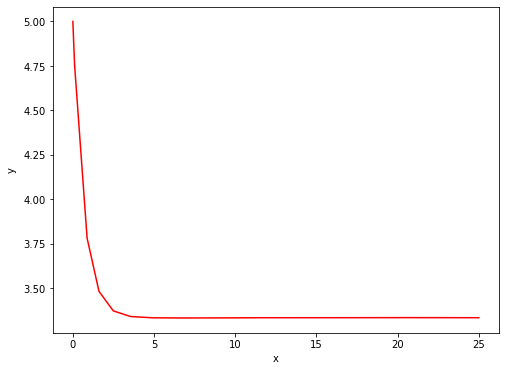

In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# initial condition
y_0 = 5

k = 1.5

# function that returns the righ hand side (rhs) of the ODE dy/dt = y'[t]
def f(t,y):
    dydt = -k * y + y_0
    return dydt

# solve ODE
result = integrate.solve_ivp(f, [0,25], [y_0])

# plot results
fig = plt.figure(figsize=(8,6))
plt.plot(result.t, result.y[0], 'r')
plt.xlabel(r'$\rm x$')
plt.ylabel(r'$\rm y$')
plt.show()

# Second-order ordinary differential equations

To solve differential equations of higher order than one, we have to rewrite the differential of order $n$ as a system of $n$ first order differential equations. 

Now, imagine for instance that we  want to solve the following second order ODE

\begin{equation*}
x''(t) = x'(t) + x(t) \,.
\end{equation*}

We can define a new function $\theta(x) = x'(t)$ to rewrite a single 2nd-order ODE as a pair of first-order ODEs:
\begin{align*}
x'(t) &= \theta(x) \\
\theta'(t) &= - \theta(t) - x(t)\,.
\end{align*}

With this in mind, we can rewrite the coupled differential equation to the form

\begin{align*}
y'(t) = f(t, y)
\end{align*}

where

$$
y(t) = 
\left(\begin{array}{cc} 
x(t) \\ 
\theta(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

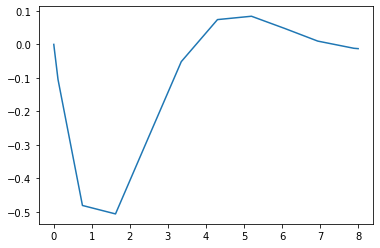

In [4]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Right hand side of the ODE
def f(t, y):
    x, theta = y
    dydt = [theta, -theta - x]
    return dydt

#Solve the system of ODEs
result = solve_ivp(f, [0, 8], [0, -1])
#Plot the results
plt.plot(result.t, result.y[0], label='x')

As you can see, this look a little chunky. This is because solve_ivp only evaluates the points, where the solver calculates the needed steps size, if nothing more is specified. We have to specify the points, where we want to evaluate the solution. This can be done by using the `t_eval` argument.

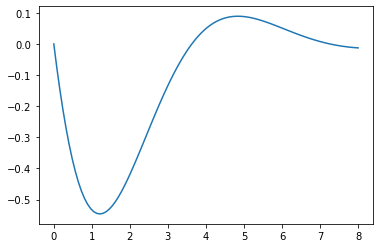

In [5]:
import numpy as np

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

Let us promote another way to set up $f(t,y)$ and implement solve_ivp.

We already computed
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

this can be rewritten as a matrix vector multiplication
$$
f(t,y) = 
\left(\begin{array}{cc} 
0 & 1 \\
-1 & -1
\end{array}\right)
*
y(t)
$$
With this, we can simplify the implementation of $f(t,y)$ to

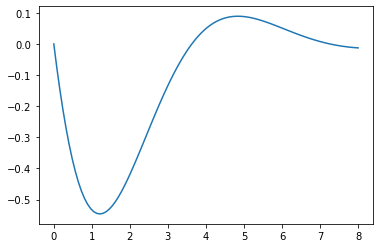

In [6]:
A = np.array([[0, 1], [-1, -1]])

def f(t, y):
    return A.dot(y)

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

# Exercise 4

We want to solve the mathematical pendulum without using the $sin(x) \approx x$ approximation.

\begin{align*}
\frac{d\theta(t)^2}{d^2t} &= - \frac{g}{l} * \sin(\theta(t))
\end{align*}

First, we want to absorb $g/l$ into the time, by defining $\tilde{t} = t \sqrt{g/l}$. Verify to yourself, that this results to

\begin{align*}
\frac{d\theta(\tilde{t})^2}{d^2\tilde{t}} &= - \sin(\theta(\tilde{t}))
\end{align*}

We have just made the differential equation dimensionless. Notice, that a change of $g$ or $l$ will result in a change of the time scale. 

1. Solve the dimensionless differential equation for $\theta(0) = \pi/4$ and $\dot{\theta}(0) = 0$. And plot your results. 
2. Calculate the period of the pendulum for $\phi \in [\pi/4, \pi/2]$. Here you can be creative for finding the period. And plot your results. 
3. Verify that $\theta(0) \rightarrow 0$, $T \rightarrow 2\pi \sqrt{l/g}$.

In [9]:
# Write your solution here

## Coupled differential equations

As a last example for Runge-Kutta, we want to solve the coupled differential equation. Let's imagine two frictionless point masses, connected by a spring which is relax at distance $d$. This system can be described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega^2 (x_1(t) - x_2(t) - d) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega^2 (x_2(t) - x_1(t) + d) &= 0
\end{align*}

We write these two second order differential equations as 4 first order differential equations by defining $\theta_1 = x'_1$ and $\theta_2 = x'_2$:
\begin{align*}
x_1'(t) &= \theta_1(t) \\
x_2'(t) &= \theta_2(t) \\
\theta_1'(t) &= - \omega^2 (x_1(t) - x_2(t) - d) \\
\theta_2'(t) &= - \omega^2 (x_2(t) - x_1(t) + d)
\end{align*}

As you can see, this equation is an inhomogeneous system. To write it in the spirit of matrix times vector, we make $d$ time dependent and expand our system of equations to

\begin{align*}
x_1'(t) &= \theta_1(t) \\
x_2'(t) &= \theta_2(t) \\
\theta_1'(t) &= - \omega^2 (x_1(t) - x_2(t) - d(t)) \\
\theta_2'(t) &= - \omega^2 (x_2(t) - x_1(t) + d(t)) \\
d'(t) &= 0
\end{align*}

And absorb the value of $d$ into the initial conditions.

So we get for $f(t,y)$ and $y(t)$:
$$
y(t) = 
\left(\begin{array}{cc} 
x_1(t) \\ 
x_2(t) \\
\theta_1(t) \\
\theta_2(t) \\
d(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cccc} 
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
- \omega^2 & \omega^2 & 0 & 0 & \omega^2  \\
\omega^2 & -\omega^2 & 0 & 0 & -\omega^2  \\
0 & 0 & 0 & 0 & 0
\end{array}\right)
*
y(t)
$$

We solve the couple differential equations for $\omega = 1$, $d = 1$, $x_1(0) = d/2$, $x_2(0) = -d/2$, $x'_1(0) = 1$ and $x'_2(0) = 0$. 


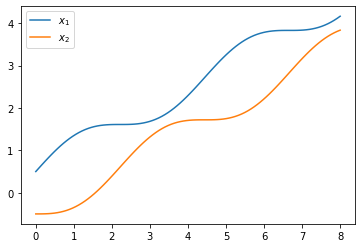

In [7]:
d = 1
omega = 1

B = np.array([[0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [-omega**2, omega**2, 0, 0, omega**2],
              [omega**2, -omega**2, 0, 0, -omega**2],
              [0, 0, 0, 0, 0]])

def f(t, y):
    return B.dot(y)

result = solve_ivp(f, [0, 8], [d/2, -d/2, 1, 0, d], t_eval=t)

plt.plot(result.t, result.y[0], label=r'$x_1$')
plt.plot(result.t, result.y[1], label=r'$x_2$')
plt.legend()

# Exercise 5 (Optional)

With this exercise, we put everything together, what we have learned so far. We imagine two frictionless point masses, which are connected by a spring. In contrast to previous example, the left point mass is also connected to a solid wall. The system is described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega_1^2 (x_1(t) - x_2(t) - d_1) + \omega_2^2 (x_1(t) - d_2) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega_1^2 (x_2(t) - x_1(t) + d_1) &= 0
\end{align*}

Solve the these equations for $\omega_1 = 1$, $\omega_2 = 1$, $d_1 = 1$, $d_2 = 1$, $x_1(0) = d_1$, $x_2(0) = d_1 + d_2$, $x'_1(0) = 1$ and $x'_2(0) = 0$.

In [ ]:
# your solution goes in here

## Bonus example, the driven damped pendulum
The driven damped pendulum is described by the second order ODE
$$\frac{d^2 \theta}{d^2 t} + \frac{1}{Q} \frac{d \theta}{d t} -\sin (\theta) - d \cos (\Omega t) =0,$$

where:
$Q$ is the quality factor,  $d$ is the forcing amplitude, $\Omega$ is the driving frequency of the forcing, $Q$ and $d$ absorved $g$, the mass $m$ and length fo the pendulum $L$.


We can transform our second order ODE into two coupled first order ODEs by introducing $\omega \equiv d\theta/dt$

$$\frac{d \theta}{d t} =\omega,\quad
\frac{d \omega}{d t} =-\frac{1}{Q} \omega +\sin (\theta) + d \cos (\Omega t) ,$$


Initial value and parameters:

$Q=2.0,\ d=1.5,\ \Omega=0.65$

$\theta(t=0)=0.0,\quad \omega(t=0)=0.0$

Let us see an implementation using **odeint** solver


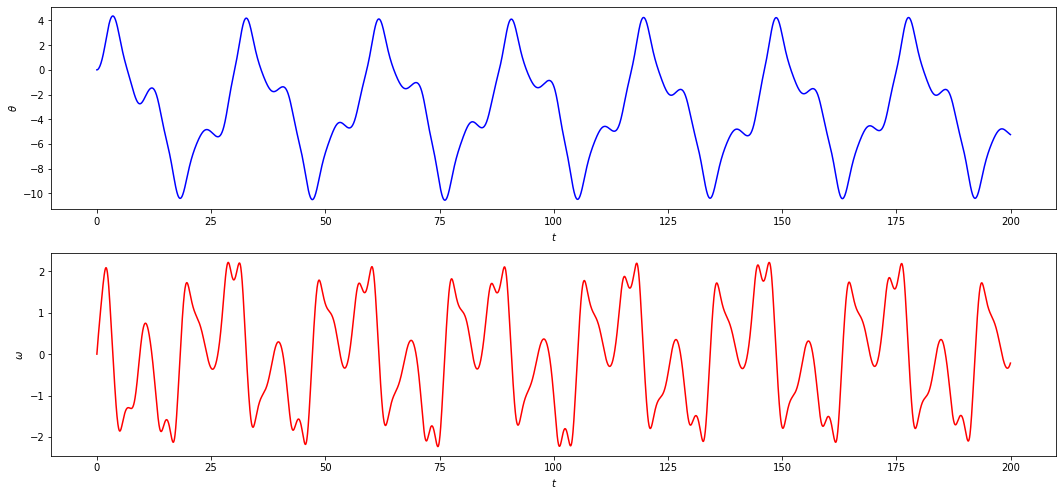

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.integrate as integrate

def rhs(t, y, Q, d, Omega):
    theta, phi = y      # unpack current values of y
    derivs = [phi,      # list of dy/dt=f functions
             -phi/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Make time array for solution
tStop = 200.      # final time
tInc = 0.05       # time step size
t = np.arange(0., tStop, tInc)

# Call the ODE solver
result = integrate.solve_ivp(rhs, [0, tStop], [theta0, omega0], t_eval=t, args=(Q, d, Omega,))

# Plot results
fig = plt.figure(1, figsize=(15,10))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(result.t, result.y[0], color='blue')
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\theta$')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(result.t, result.y[1], color='red')
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$\omega$')

plt.tight_layout()
plt.show()

# Exercise 6: Neutron star with constant density (Optional)

Any integration problem can also be formulated in a system of odes. This exercise encourages you to do so. 

Schwarzchild solution of the relativistic star with uniform density is

$$\frac{dp}{dr}= \frac{4\pi}{3} G \rho^2 r, --> {\rm hydrostatic\ equilibrium}\\
m(r)=\frac{4\pi}{3}\rho r^3, \quad --> {\rm Mass\ equation*} $$


Charles W. Misner, K. S. Thorne, and J. A. Wheeler.Gravitation. W. H.Freeman, San Francisco, 1973. Chapter 23: Spherical stars.

### Initial condition

- $\rho= \rho_{0}, $ for $r<R_{\star}$ and $\rho= \rho_{\rm atm}, $ for $r>R_{\star}$, where $R_{\star}$ is the radius of the star, and $\rho_{\rm atm}$ is the density at star atmosphere.
- Use $G=1$ 
- Initial condition for density, pressure and radius of the star:
$\rho_{0}=1.28 \times 10^{-3},\quad \rho_{\rm atm}=0.0,\quad p_{0}= 9.62 \times 10^{-2},\ \quad R_{\star}=5.4$. 

### Task

- Solve ODE for pressure using `solve_ivp` in the radial domain $r\in [0,6]$ with resolution $dr=$1.e-2.
- Compute the total mass of the star $M=m(R)$.
- Show the plot for density and pressure (in the same figure), include the mass and radius of the star as a title of figure (top part), also include appropriate x and y labels.



In [21]:
# Your solution goes in here

# Error estimation and adaptive step size (optional)

For most cases, the step size is chosen wrong. For smooth function intervals, we want the step size to be large and for non smooth sections we want small step sizes. The goal is, to compute accurate step sizes. 

In this section we will go over the error estimation of the RK45 method. The basic idea is, that the RK5 formulas are said to be the precise solution with respect to RK4 and the error will be estimated by a difference between these two methods. 

\begin{align*}
E_{n+1} = y_{n+1} - \hat{y}_{n+1}
\end{align*}

Where the 'hat' indicates the RK(n+1) step.

The step size is the calculated with 

\begin{align*}
h_{n+1} = 0.9 h_n \left[ \frac{\delta}{||E||_{\infty}} \right]^{1/5}
\end{align*}

where $\delta = \delta_{absolute} + \delta_{relative}\ |y|$.

Note, that there exist plenty of different methods for error estimation. For example comparing two $h/2$ steps with one $h$ step and estimating the error from this difference. 

# Solving differential equations by matrix inversion (optional)

Last, we want to study a nice method to solve differential equations, by inverting a matrix operator. 

For example: We want to solve a boundary value problem for an electric potential. Two grounded infinite long metal plates and in the center a negatively charged plate. 

The potential is described by the following differential equation:
\begin{align*}
\frac{\partial ^2 \phi}{\partial x^2} = - \rho(x) = - \delta(x)
\end{align*}

We need to discretize this equation step by step with choosing $(x_0, \dots, x_i, \dots, x_{M = 2N + 1})$ as our lattice points, with $\phi_{M} = \phi_{-1} = 0$ the boundary conditions and $h$ as the lattice spacing.

First, we start with the delta function.
We remember, that it needs to fulfill the following condition:

\begin{align*}
\int f(x) \delta(x) dx = f(0)
\end{align*}

By setting 
$$
\delta(x) \longrightarrow \frac{1}{h} \delta_{i, N}
$$
we can fulfill this condition.

Secondly, we discretize the derivative of the electric potential. This is easily done by using the formula for the second derivative of last lecture and using $\phi(x_i) = \phi_i$.
\begin{align*}
\frac{\partial ^2 \phi}{\partial x^2} \phi(x) \longrightarrow &\frac{\phi(x_i+h) -2\phi(x_i) + \phi(x_i-h)}{h^2} \\
&\frac{\phi_{i+1} -2\phi_i + \phi_{i-1}}{h^2} \\
&\sum_{j=1}^{N - 1}\frac{\delta_{j, i+1} -2\delta_{j,i} + \delta_{j, i-1}}{h^2} \phi_j
\end{align*}

All this can be rewritten into a Matrix Vector equation
\begin{align*}
D \vec{\phi} = 1/h \vec{\delta}
\end{align*}

where
\begin{align*}
D = \frac{\delta_{j, i+1} -2\delta_{j,i} + \delta_{j, i-1}}{h^2}
\end{align*}

The solution of $\phi_i$ is then given by
\begin{align*}
\vec{\phi} = \frac{1}{h} D^{-1} \vec{\delta}
\end{align*}

We go threw the code and explain in comments, what is happening. But you don't have to understand everything, this is just to prove, that this concept exists and works. 

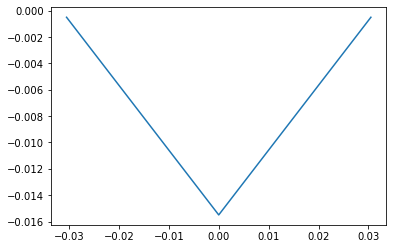

In [12]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg
import numpy as np
import matplotlib.pyplot as plt

N = 30
M = 2*N + 1
h = 0.001

L = M*h

# define a kroneker-delta function
def d(i,j):
    return 1 if i==j else 0

# calculate the nonzero entries of the matrix
row = []
col = []
data = []

for i in range(M):
    for j in range(M):
        value = d(j, (i+1)) - 2 * d(j, i) + d(j, (i-1))

        if value != 0:
            row.append(i)
            col.append(j)
            data.append(value/h**2)

row_array = np.array(row)
col_array = np.array(col)
data_array = np.array(data)

# implement a sparse matrix (a matrix which consists mostly of zero elements)
D = csc_matrix((data_array, (row_array, col_array)), shape=(M, M))

# define the right-hand side of the equation
delta_function = np.zeros(M)
delta_function[N] = +1/h

# use the conjugate gradient method to solve the equation
phi = cg(D, delta_function, x0=np.random.rand(M))[0]

# define the x-coordinates of the points
x = np.linspace(-L/2, L/2, M)

# plot the solution
plt.plot(x, phi)